In [149]:
!ls stockData

AAPL.csv  BIIB.csv  CVS.csv   EOG.csv   INTC.csv  MRK.csv   PX.csv    TWX.csv
ABT.csv   BMY.csv   CVX.csv   EXC.csv   JNJ.csv   MS.csv    QCOM.csv  TXN.csv
AIG.csv   C.csv     DD.csv    F.csv     JPM.csv   MSFT.csv  SBUX.csv  UNH.csv
AMGN.csv  CAT.csv   DE.csv    GE.csv    KO.csv    NKE.csv   SLB.csv   UNP.csv
APA.csv   CELG.csv  DELL.csv  GILD.csv  LLY.csv   ORCL.csv  SO.csv    USB.csv
APC.csv   CL.csv    DHR.csv   HAL.csv   LOW.csv   OXY.csv   SP500.csv UTX.csv
AXP.csv   CMCSA.csv DIS.csv   HD.csv    MCD.csv   PEP.csv   SPG.csv   VZ.csv
BA.csv    COP.csv   DOW.csv   HON.csv   MDT.csv   PFE.csv   T.csv     WFC.csv
BAC.csv   COST.csv  EMC.csv   HPQ.csv   MMM.csv   PG.csv    TGT.csv   WMT.csv
BAX.csv   CSCO.csv  EMR.csv   IBM.csv   MO.csv    PNC.csv   TJX.csv   XOM.csv


In [150]:
!ls data

DAT_ASCII_EURUSD_M1_201612.csv
DAT_ASCII_EURUSD_M1_201612.txt
DAT_ASCII_EURUSD_T_201612.csv
DAT_ASCII_EURUSD_T_201612.txt
Untitled.ipynb
fxhistoricaldata_EURGBP_hour.csv
index.html?%2Fascii%2Ftick-data-quotes%2Feurusd%2F2016%2F11
pairs.txt


In [151]:
!head data/DAT_ASCII_EURUSD_M1_201612.csv

20161201 000000;1.060250;1.060270;1.060150;1.060230;0
20161201 000100;1.060250;1.060450;1.060250;1.060370;0
20161201 000200;1.060370;1.060710;1.060370;1.060710;0
20161201 000300;1.060710;1.060710;1.060520;1.060530;0
20161201 000400;1.060550;1.060770;1.060550;1.060730;0
20161201 000500;1.060720;1.060760;1.060620;1.060620;0
20161201 000600;1.060620;1.060680;1.060550;1.060600;0
20161201 000700;1.060620;1.060620;1.060460;1.060460;0
20161201 000800;1.060450;1.060510;1.060420;1.060420;0
20161201 000900;1.060410;1.060510;1.060390;1.060510;0


In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


In [153]:
!head stockData/F.csv

In [154]:
def load_stock_data(sym):
    df = pd.read_csv('stockData/{sym}.csv'.format(sym=sym), index_col=0, parse_dates=True)
    df['px'] = df['Adjusted Close']
    del df['Adjusted Close']

    df['ret'] = (df['px']/df['px'].shift(1)) - 1
    df['lret'] = np.log(df['px']/df['px'].shift(1))
    
    df['ret'] = df['ret']- df['ret'].mean()
    df['lret'] = df['lret']- df['lret'].mean()
    return df


In [155]:
def moving_average_crossover(series, long_win, short_win):
    slow = series.shift(1).rolling(long_win).mean()
    fast = series.shift(1).rolling(short_win).mean()
    return 2.0*(fast > slow) -1

,px,ret,lret
2016-09-23,93.269997,-0.002055,-0.001877
2016-09-26,91.959999,-0.014601,-0.014522
2016-09-27,91.720001,-0.003166,-0.002990
2016-09-28,92.199997,0.004677,0.004842
2016-09-29,91.800003,-0.004894,-0.004725


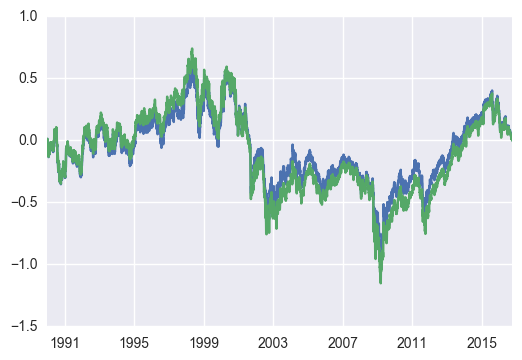

In [156]:
df= load_stock_data('DIS')
display(df.tail())
plt.plot(df[['ret', 'lret']].cumsum())


In [157]:
strat = moving_average_crossover(df.lret, 30, 15) * df['lret']

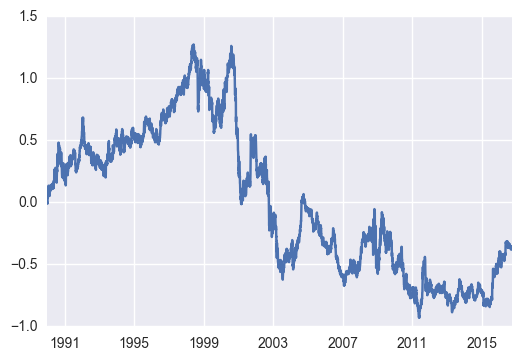

In [158]:
plt.plot(strat.cumsum())

- for all stocks split to train, dev, test.
- compute range of 5*ma_cross signals.
- compute return for each
- summarise mean performance across the set. train / dev / test

- then train single model across all train. tune on dev.
- compare that model mean performance across all stocks.

** set up hold out set of stocks that aren't used for model development.

In [159]:
len(df)

6741

In [160]:
df.describe().ix['std'] * np.sqrt(252)

px      396.508515
ret       0.300589
lret      0.300205
Name: std, dtype: float64

In [190]:
for i in range(1,61):
    df['mavol' + str(i)] = df['lret'].rolling(i).std() 


In [191]:
df.head()

,px,ret,lret,mavol1,mavol2,mavol3,mavol4,mavol5,mavol6,mavol7,...,mavol51,mavol52,mavol53,mavol54,mavol55,mavol56,mavol57,mavol58,mavol59,mavol60
1990-01-02,7.226380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,7.242024,0.001609,0.001785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,7.234198,-0.001637,-0.001458,NaN,0.002294,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,7.257662,0.002687,0.002861,NaN,0.003054,0.002249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,7.319978,0.008030,0.008172,NaN,0.003756,0.004824,0.004001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
x = pd.Series()

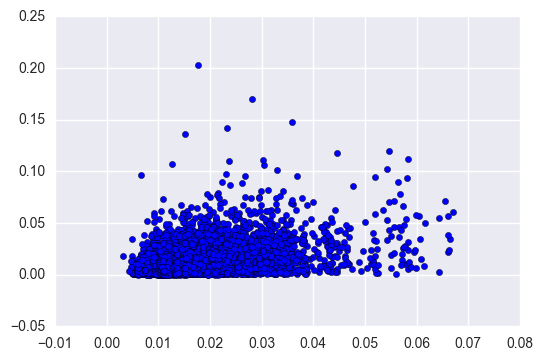

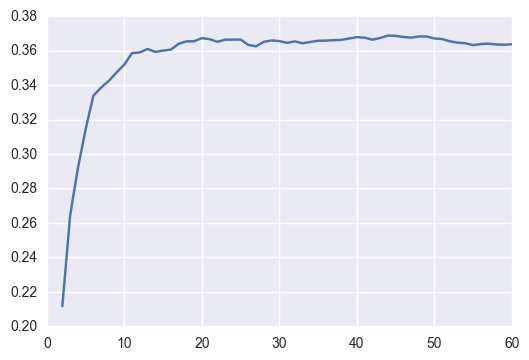

In [206]:
y = df['lret'].shift(-1).abs()
corr = []
ix = []
for i in range(1,61):
    x = df['mavol' + str(i)]
    #print  i, x.corr(y)
    ix.append(i)
    corr.append(x.corr(y))
    
plt.scatter( df['mavol20'], y)
plt.show()
plt.plot(ix, corr)

In [207]:
import keras

Using TensorFlow backend.
